Multiple linear regression – Mao
Lasso – Mao
NN - Mao


consider:
1. transformation
2. standarization normorlization


In [2]:
# change directory
import os
os.getcwd()
os.chdir('./Data')

In [36]:

### for install packages
# !conda install numpy

import seaborn as sns
import pandas as pd

# parallel computing
import multiprocessing
n_jobs = multiprocessing.cpu_count()-2



# metrics

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [4]:
import shap
import numpy as np

# the below code is only for shap package
np.bool = np.bool_
np.int = np.int_


D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:62: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to th

D:\Coding\envs\STT\lib\site-packages\whisper\timing.py:58: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
  
Solve the warning
Add nopython=True inside @numba.jit() decorator in file *\lib\site-packages\whisper\timing.py:58

Like this:
  
  

In [5]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')


In [24]:
features = X_train.columns
print(features)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')


In [6]:
# define the prediction results from different model

preds = dict()

## Linear Model

Cite the folloiwng paper for package "statsmodels"

@inproceedings{seabold2010statsmodels,
  title={statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}


warm-up reference
https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/

### Assumptions Check
* Linear relationship.
* Multivariate normality.
* No or little multicollinearity.
* No auto-correlation.
* Homoscedasticity.

In [6]:
y_predict_average_ini = [1] * 10434

mean_predict = (np.mean(y_train))[0]
y_predict_average = [ x * mean_predict  for x in y_predict_average_ini ]
#average_list * 
#print(y_predict_average)

np.sqrt(mean_squared_error(y_test, y_predict_average))

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


0.02951769853137689

In [16]:
from sklearn.linear_model import LinearRegression, ElasticNet

reg_lin = LinearRegression()

reg_lin.fit(X_train,y_train)

y_pred_lin = reg_lin.predict(X_test)
print(y_pred_lin)

preds['linear regression'] = y_pred_lin

[[0.6623476 ]
 [0.70503039]
 [0.69890844]
 ...
 [0.69305842]
 [0.66290783]
 [0.66108489]]


In [8]:
y_pred_lin
reg_lin.coef_

array([[ 0.0937841 , -0.16103011,  0.08737044, -0.17458344,  0.20125781,
         0.92142105, -0.18861643,  0.03779076, -0.05260248,  0.01202342,
         0.05513167]])

from itertools import chain
def flatten_chain(matrix):
    return list(chain.from_iterable(matrix))


y_pred = flatten_chain(y_pred)
print(y_pred)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred_lin))

0.012035271117330902

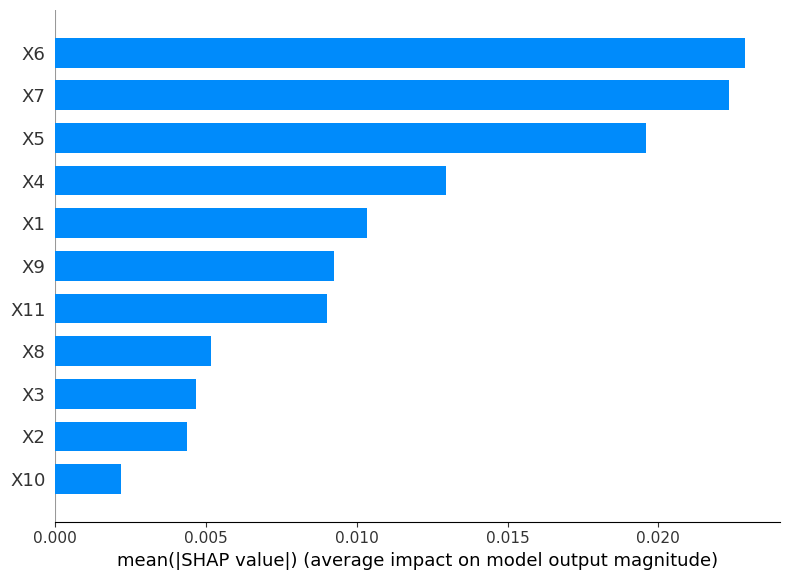

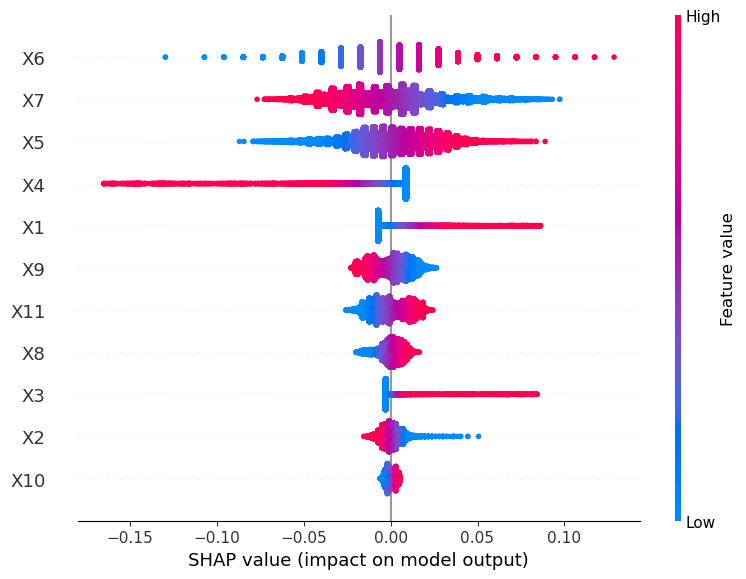

In [31]:
##### Shap values
# https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670
# Create object that can calculate shap values
explainer_lin = shap.LinearExplainer(reg_lin, X_train)

shap_values_lin = explainer_lin.shap_values(X_train)

shap.summary_plot(shap_values_lin, X_train, plot_type="bar")

shap.summary_plot(shap_values_lin, X_train)

# ElasticNet

In [20]:
# lasso

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {"alpha":[0.01, 0.001, 0.0001, 0.00001, 0.000001],

"l1_ratio": [0, 0.1, 0.3, 0.5, 0.8, 1]
                }


reg_lin_lasso = ElasticNet(random_state=0, l1_ratio=1, 
alpha = 0.00001).fit(X_train,y_train)


clf_cv_lasso = GridSearchCV(reg_lin_lasso, param_grid_lasso, scoring = "neg_root_mean_squared_error",  cv = 10, n_jobs = n_jobs)

CV_grid_results_lasso= clf_cv_lasso.fit(X_train, np.array(y_train))

print("best_params_: {},\n best_score_ in cross validation: {}".format(clf_cv_lasso.best_params_, clf_cv_lasso.best_score_))

best_params_: {'alpha': 1e-06, 'l1_ratio': 1},
 best_score_: -0.012111880653003717


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e-02, tolerance: 1.345e-03


In [21]:
y_pred_lasso = CV_grid_results_lasso.predict(X_test)

preds['linear regression lasso'] = y_pred_lasso

print(reg_lin_lasso.coef_)


#print(y_pred_lasso)
print("Testing Results:{}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso))))


[ 0.02516018 -0.06446926 -0.         -0.01840012  0.15571437  0.81205319
 -0.08694066 -0.01694917  0.         -0.          0.01599576]
Testing Results:0.01204504601939699


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e-02, tolerance: 1.345e-03


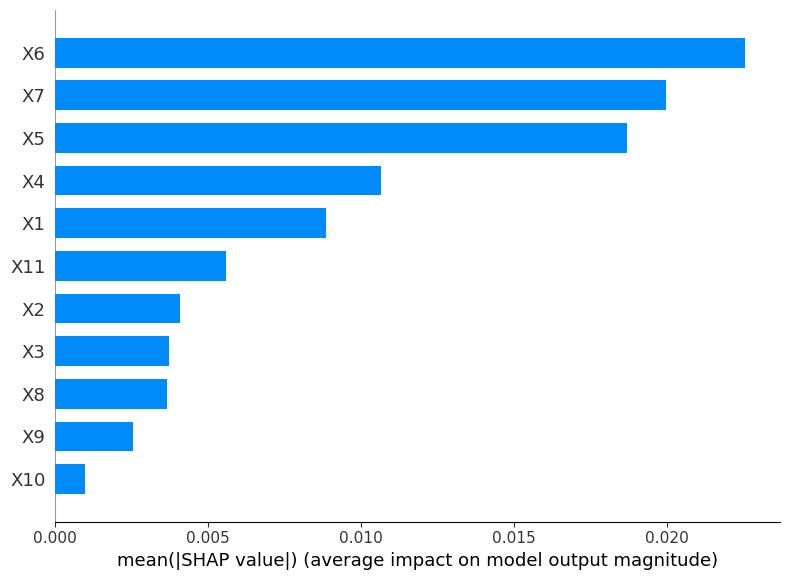

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


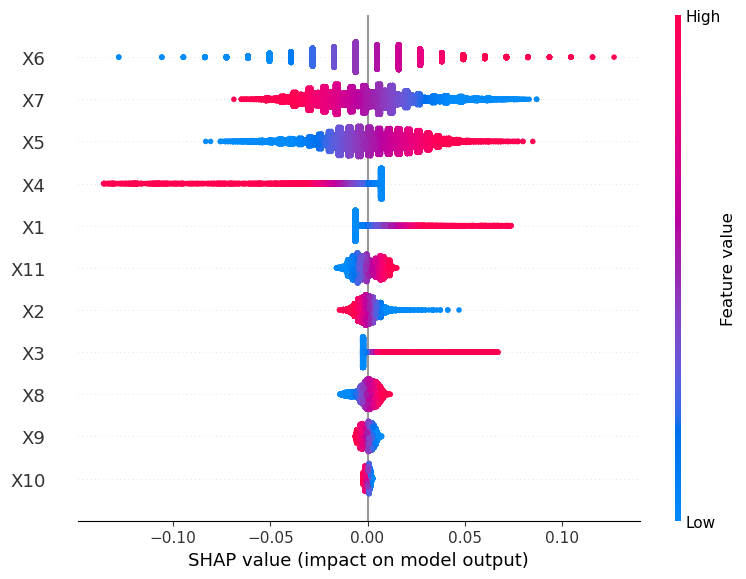

In [33]:
##### Shap values
# https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670
# Create object that can calculate shap values


reg_lin_lasso_best = ElasticNet(**clf_cv_lasso.best_params_)

reg_lin_lasso_best.fit(X_train,y_train)

explainer_lin = shap.LinearExplainer(reg_lin_lasso_best, X_train)

shap_values_lin = explainer_lin.shap_values(X_train)

shap.summary_plot(shap_values_lin, X_train, plot_type="bar")

shap.summary_plot(shap_values_lin, X_train)

# MLP



reference for scoring-parameter: evaluation metric in cross validation

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [8]:
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import GridSearchCV

param_grid_NN = {
    'hidden_layer_sizes': list(zip([1000], [300])),
    #'max_iter': [50, 100],
    #'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}


reg_NN = MLPRegressor(random_state=1, hidden_layer_sizes = (20, 20))

clf_cv_nn = GridSearchCV(reg_NN, param_grid_NN, scoring = "neg_root_mean_squared_error",  cv = 10, n_jobs = n_jobs)

y_pred_NN = CV_grid_results_nn= clf_cv_nn.fit(X_train, np.array(y_train))

print("best_params_: {},\n best_score_: {}".format(CV_grid_results_nn.best_params_, CV_grid_results_nn.best_score_))



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


best_params_: {'hidden_layer_sizes': (1000, 300)},
 best_score_: -0.012322065993448237


In [9]:
y_pred_NN = CV_grid_results_nn.predict(X_test)
preds['MLP'] = y_pred_NN

np.sqrt(mean_squared_error(y_test, y_pred_NN))

0.011682708560977558

In [10]:
reg_NN = MLPRegressor(random_state=1, **CV_grid_results_nn.best_params_)

reg_NN.fit(X_train.to_numpy(),y_train)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


MLPRegressor(hidden_layer_sizes=(1000, 300), random_state=1)

In [12]:
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [13]:

explainer_NN = shap.KernelExplainer(reg_NN.predict,X_train_summary )



In [18]:
X_train.iloc[:10,:]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977
5,0.001326,0.833333,0.001257,0.001270,0.684211,0.804878,0.757576,0.771654,0.303125,0.298077,0.299419
6,0.002963,0.833333,0.001297,0.001504,0.684211,0.804878,0.757576,0.763780,0.309375,0.307692,0.296512
7,0.070760,0.858974,0.001552,0.022656,0.684211,0.829268,0.765152,0.771654,0.306250,0.294872,0.293605
8,0.518519,0.948718,0.455796,0.476562,0.585526,0.926829,0.636364,0.622047,0.378125,0.368590,0.369186
9,0.004230,0.884615,0.003831,0.004141,0.697368,0.841463,0.787879,0.811024,0.315625,0.304487,0.316860


In [29]:
shap_values_NN = explainer_NN.shap_values(X_train.iloc[:100,:], nsample = 1000)


  0%|          | 0/100 [00:00<?, ?it/s]

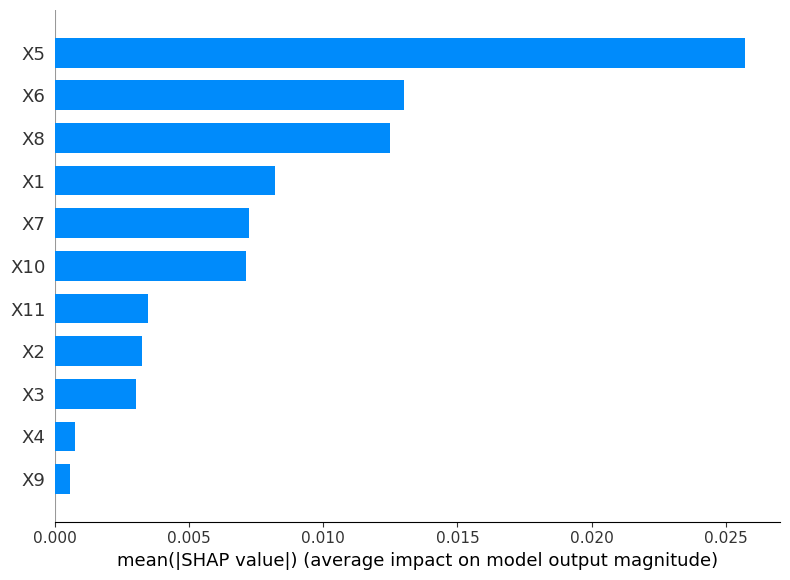

In [30]:

shap.summary_plot(shap_values_NN, X_train, plot_type="bar")



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


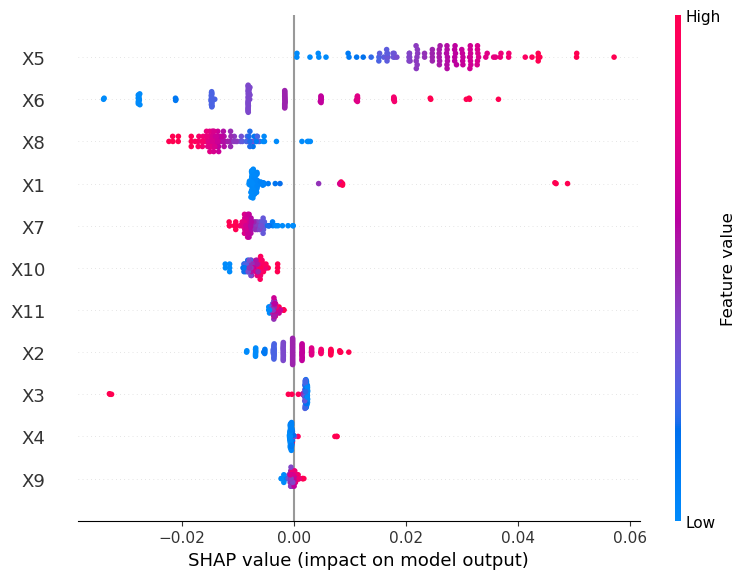

In [34]:
shap.summary_plot(shap_values_NN, X_train.iloc[:100,:])

# lightGBM

In [37]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Creating a LightGBM dataset
#lgb_train = lgb.Dataset(X_train, label=y_train)
#lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)


# Define LightGBM parameters grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 15],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'num_leaves': [20, 31, 50, 100,200],
    'n_estimators': [50, 100, 200, 500, 800]
}

# Create a LightGBM model
model_lgb = lgb.LGBMRegressor(objective='regression', metric='rmse')

# Define a custom scoring function (negative RMSE since GridSearchCV minimizes the score)
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred, squared=False))

# Perform hyperparameter tuning using GridSearchCV
clf_cv_lgb = GridSearchCV(model_lgb, param_grid, cv=10, scoring=scoring, n_jobs = n_jobs)
clf_cv_lgb.fit(X_train, y_train)




GridSearchCV(cv=10,
             estimator=LGBMRegressor(metric='rmse', objective='regression'),
             n_jobs=10,
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 15],
                         'n_estimators': [50, 100, 200, 500, 800],
                         'num_leaves': [20, 31, 50, 100, 200]},
             scoring=make_scorer(<lambda>))

In [38]:
# Get the best hyperparameters and best model
best_params_lgb = clf_cv_lgb.best_params_
best_model_lgb = clf_cv_lgb.best_estimator_


print("Best Hyperparameters:", best_params_lgb)

# Making predictions on the validation data using the best model
y_pred_lgb = best_model_lgb.predict(X_test)


preds['lightGBM'] = y_pred_NN

# Calculating RMSE on the validation data
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print("LightGBM RMSE on Validation Data with Best Model:", rmse_lgb)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 20}
LightGBM RMSE on Validation Data with Best Model: 0.011072306794378525


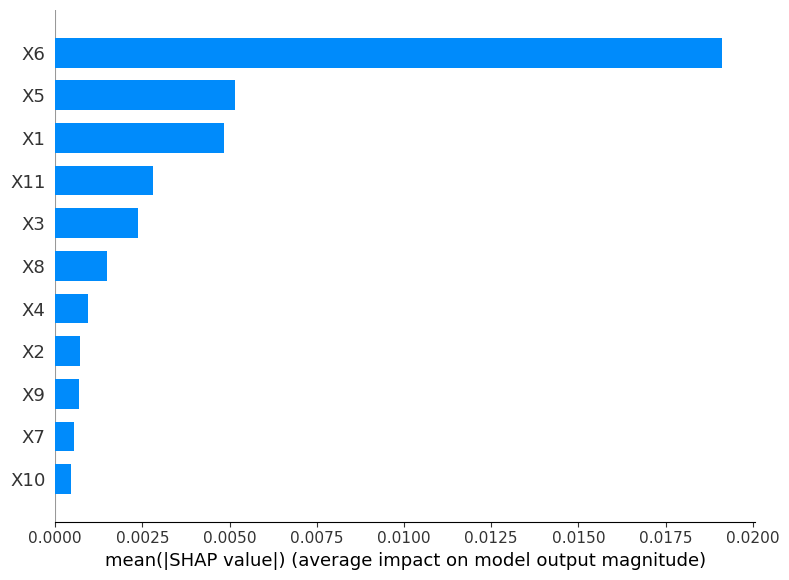

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


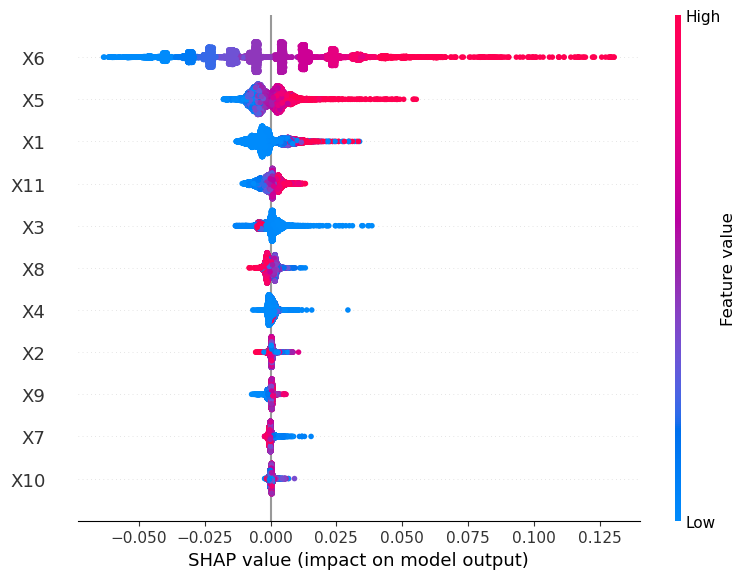

In [41]:
reg_lgb = lgb.LGBMRegressor(objective='regression', metric='rmse', **best_params_lgb)



LGBM_model=reg_lgb.fit(X_train, y_train)


explainer_lightGBM = shap.TreeExplainer(LGBM_model)
shap_values_lightGBM = explainer_lightGBM.shap_values(X_train)
shap.summary_plot(shap_values_lightGBM, X_train, plot_type="bar")

shap.summary_plot(shap_values_lightGBM, X_train)